This code is detect ddos attack for general inbound and outbound traffic.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('fileinbound2.csv')
df 

,category,timestamp,n_pkts_dropped,n_bits_dropped,n_pkts_bypassed,n_rx_bits,n_rx_pkts,n_tx_bits,n_tx_pkts,n_rx_offload_bits,n_rx_offload_pkts,n_tx_offload_bits,n_tx_offload_pkts
0,OutboundTrafficMetrics,30-05-2023 05:31:11,3,35,5,13248,8,12968,8,0,0,0,0
1,InboundTrafficMetrics,30-05-2023 05:31:11,0,0,7,16656,7,16656,7,0,0,0,0
2,OutboundTrafficMetrics,30-05-2023 05:31:11,3,35,5,13248,8,12968,8,0,0,0,0
3,InboundTrafficMetrics,30-05-2023 05:31:11,0,0,7,16360,7,16360,7,0,0,0,0
4,OutboundTrafficMetrics,30-05-2023 05:31:11,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49887,InboundTrafficMetrics,31-05-2023 05:30:55,0,0,0,0,0,0,0,0,0,0,0
49888,OutboundTrafficMetrics,31-05-2023 05:30:55,0,0,0,0,0,0,0,0,0,0,0
49889,InboundTrafficMetrics,31-05-2023 05:30:55,0,0,0,576,2,576,2,0,0,0,0
49890,OutboundTrafficMetrics,31-05-2023 05:30:55,0,0,0,0,0,0,0,0,0,0,0


In [3]:
filtered_df = df[df['n_rx_bits'] != 0]

filtered_df.shape

(27525, 13)

In [4]:
columns=['n_pkts_dropped','n_bits_dropped','n_pkts_bypassed','n_rx_offload_bits','n_rx_offload_pkts','n_tx_offload_bits','n_tx_offload_pkts']
df1=filtered_df.drop(columns,axis=1)

In [5]:
model = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.3),max_features=1.0)
model.fit(df1[['n_rx_bits']])

/home/haltdos/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.3)

In [6]:
df1['anamoly_scores']= model.decision_function(df1[['n_rx_bits']])
df1['anamoly']= model.predict(df1[['n_rx_bits']])
df1.head(60)

,category,timestamp,n_rx_bits,n_rx_pkts,n_tx_bits,n_tx_pkts,anamoly_scores,anamoly
0,OutboundTrafficMetrics,30-05-2023 05:31:11,13248,8,12968,8,0.033269,1
1,InboundTrafficMetrics,30-05-2023 05:31:11,16656,7,16656,7,0.028672,1
2,OutboundTrafficMetrics,30-05-2023 05:31:11,13248,8,12968,8,0.033269,1
3,InboundTrafficMetrics,30-05-2023 05:31:11,16360,7,16360,7,0.028796,1
6,OutboundTrafficMetrics,30-05-2023 05:31:21,9272,4,9200,4,0.030924,1
7,InboundTrafficMetrics,30-05-2023 05:31:21,7312,4,7312,4,0.031118,1
8,OutboundTrafficMetrics,30-05-2023 05:31:21,9272,4,9200,4,0.030924,1
9,InboundTrafficMetrics,30-05-2023 05:31:21,7024,4,7024,4,0.030893,1
12,OutboundTrafficMetrics,30-05-2023 05:31:31,6696,6,6696,6,0.029477,1
13,InboundTrafficMetrics,30-05-2023 05:31:31,59512,9,59512,9,-0.012328,-1


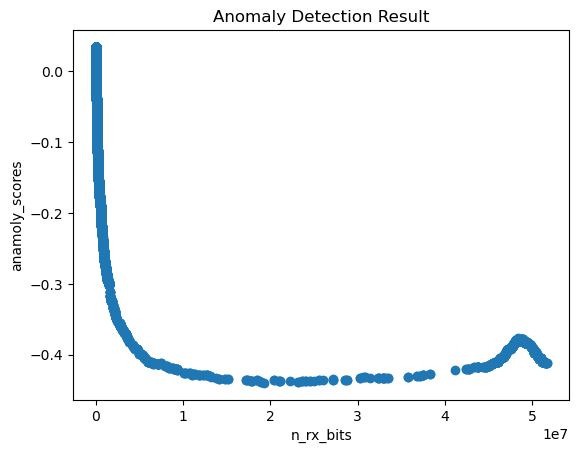

In [7]:
plt.scatter(df1['n_rx_bits'], df1['anamoly_scores'])
plt.xlabel('n_rx_bits')
plt.ylabel('anamoly_scores')
plt.title('Anomaly Detection Result')
plt.show()

In [8]:
filtered_rows = df1[df1['anamoly'] == -1]
filtered_rows.head(60)

,category,timestamp,n_rx_bits,n_rx_pkts,n_tx_bits,n_tx_pkts,anamoly_scores,anamoly
13,InboundTrafficMetrics,30-05-2023 05:31:31,59512,9,59512,9,-0.012328,-1
15,InboundTrafficMetrics,30-05-2023 05:31:31,58928,8,58928,8,-0.013105,-1
121,InboundTrafficMetrics,30-05-2023 05:34:31,188720,27,188720,27,-0.106553,-1
123,InboundTrafficMetrics,30-05-2023 05:34:31,188424,27,188424,27,-0.105530,-1
324,OutboundTrafficMetrics,30-05-2023 05:40:11,61928,15,61784,14,-0.010875,-1
326,OutboundTrafficMetrics,30-05-2023 05:40:11,61928,15,61784,14,-0.010875,-1
396,OutboundTrafficMetrics,30-05-2023 05:42:11,40808,14,40736,14,-0.000291,-1
398,OutboundTrafficMetrics,30-05-2023 05:42:11,40808,14,40736,14,-0.000291,-1
511,InboundTrafficMetrics,30-05-2023 05:45:21,64816,12,64816,12,-0.011710,-1
513,InboundTrafficMetrics,30-05-2023 05:45:21,64232,12,64232,12,-0.009522,-1


In [9]:
filtered_rows.shape

(8256, 8)

In [10]:
filtered_rows1 = df1[df1['n_rx_bits'] == 0]
filtered_rows1.shape

(0, 8)

In [11]:
filtered_rows1.shape

(0, 8)

Calculating zscore and deciding threshold for anamolies

/tmp/ipykernel_6080/2720565029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])
/tmp/ipykernel_6080/2720565029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])


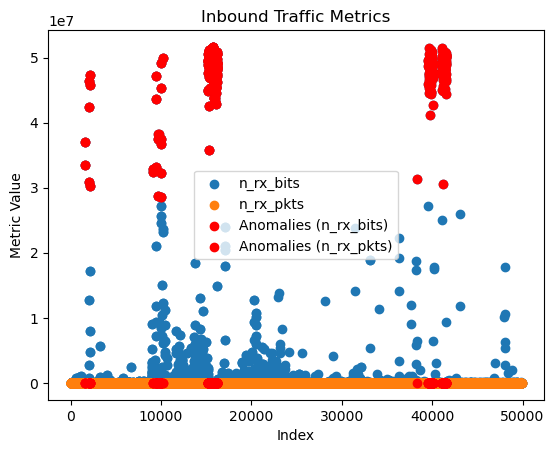

In [13]:
from scipy.stats import zscore

inbound_traffic = df1[df1['category'] == 'InboundTrafficMetrics']

metrics = ['n_rx_bits', 'n_rx_pkts']

for metric in metrics:
    inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])

threshold = 3  

anomalies = inbound_traffic[
    (np.abs(inbound_traffic[f'{metrics[0]}_zscore']) > threshold) |
    (np.abs(inbound_traffic[f'{metrics[1]}_zscore']) > threshold)
]

plt.scatter(inbound_traffic.index, inbound_traffic['n_rx_bits'], label='n_rx_bits')
plt.scatter(inbound_traffic.index, inbound_traffic['n_rx_pkts'], label='n_rx_pkts')
plt.scatter(anomalies.index, anomalies['n_rx_bits'], color='r', label='Anomalies (n_rx_bits)')
plt.scatter(anomalies.index, anomalies['n_rx_pkts'], color='r', label='Anomalies (n_rx_pkts)')
plt.xlabel('Index')
plt.ylabel('Metric Value')
plt.title('Inbound Traffic Metrics')
plt.legend()
plt.show()



In [16]:
from scipy.stats import zscore

inbound_traffic = df1[df1['category'] == 'InboundTrafficMetrics']

metrics = ['n_rx_bits', 'n_rx_pkts']
threshold = 3 

for metric in metrics:
    inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])

anomalies = inbound_traffic[
    (np.abs(inbound_traffic[f'{metrics[0]}_zscore']) > threshold) |
    (np.abs(inbound_traffic[f'{metrics[1]}_zscore']) > threshold)
]

anomaly_dataframe = inbound_traffic.loc[anomalies.index]

anomaly_dataframe.tail(60)


/tmp/ipykernel_6080/903913879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])
/tmp/ipykernel_6080/903913879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])


,category,timestamp,n_rx_bits,n_rx_pkts,n_tx_bits,n_tx_pkts,anamoly_scores,anamoly,n_rx_bits_zscore,n_rx_pkts_zscore
41215,InboundTrafficMetrics,31-05-2023 02:24:55,48681312,4498,48681312,4498,-0.378749,-1,5.266504,5.241553
41221,InboundTrafficMetrics,31-05-2023 02:25:05,48662520,4501,48662520,4501,-0.378749,-1,5.264388,5.245199
41227,InboundTrafficMetrics,31-05-2023 02:25:15,47946352,4438,47946352,4438,-0.383399,-1,5.183770,5.168645
41233,InboundTrafficMetrics,31-05-2023 02:25:25,45694440,4225,45694440,4225,-0.410829,-1,4.930276,4.909819
41239,InboundTrafficMetrics,31-05-2023 02:25:35,50548032,4673,50548032,4673,-0.400165,-1,5.476638,5.454204
41245,InboundTrafficMetrics,31-05-2023 02:25:45,48338496,4473,48338496,4473,-0.377720,-1,5.227914,5.211175
41251,InboundTrafficMetrics,31-05-2023 02:25:55,49272088,4553,49272088,4553,-0.382363,-1,5.333007,5.308386
41257,InboundTrafficMetrics,31-05-2023 02:26:05,48922920,4524,48922920,4524,-0.378749,-1,5.293701,5.273147
41263,InboundTrafficMetrics,31-05-2023 02:26:15,46863792,4334,46863792,4334,-0.399106,-1,5.061908,5.042270
41269,InboundTrafficMetrics,31-05-2023 02:26:25,47471408,4391,47471408,4391,-0.391737,-1,5.130307,5.111533


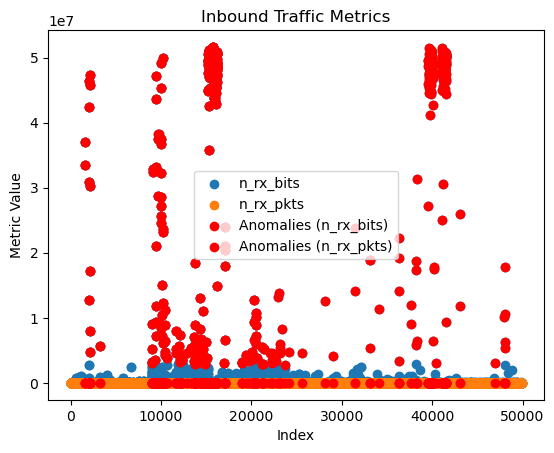

In [22]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Load and preprocess the data
inbound_traffic = df1[df1['category'] == 'InboundTrafficMetrics']
metrics = ['n_rx_bits', 'n_rx_pkts']
data = inbound_traffic[metrics].values

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
model.fit(data)

# Predict anomalies
anomaly_scores = model.decision_function(data)
anomalies = inbound_traffic[np.where(anomaly_scores < 0, True, False)]

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(inbound_traffic.index, inbound_traffic['n_rx_bits'], label='n_rx_bits')
plt.scatter(inbound_traffic.index, inbound_traffic['n_rx_pkts'], label='n_rx_pkts')
plt.scatter(anomalies.index, anomalies['n_rx_bits'], color='r', label='Anomalies (n_rx_bits)')
plt.scatter(anomalies.index, anomalies['n_rx_pkts'], color='r', label='Anomalies (n_rx_pkts)')
plt.xlabel('Index')
plt.ylabel('Metric Value')
plt.title('Inbound Traffic Metrics')
plt.legend()
plt.show()
